<a href="https://colab.research.google.com/github/iLuisOlivares/Sistema-de-control-borroso-de-un-avi-n./blob/main/Parcial_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Integrantes:
## Luis Olivares Puello
## Cesar Hernando Leiva

In [ ]:
#Librerias
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Funcion Sigmoidal -> funcion para calcular el valor de y tanto para la sigmoidal izquierda o derecha
def funcionSigmoidal(x,alfa,beta,epsilon, direccion="derecha"):
    if (direccion=="derecha"):
        if(x <= alfa):
            return 0
        elif(alfa <= x and x <= beta):
            return 2*(((x-alfa)/(epsilon-alfa)))**2
        elif(beta <= x and x <= epsilon):
            return 1-2*(((x-epsilon)/(epsilon-alfa))**2)
        elif(x>=epsilon):
            return 1
    elif(direccion=="izquierda"):
        if(x <= alfa):
            return 1
        elif(alfa <= x and x <= beta):
            return 1-2*((x-alfa)/(epsilon-alfa))**2
        elif(x>=beta and x<epsilon):
            return 2*((x-epsilon)/(epsilon-alfa))**2
        elif(x>= epsilon):
            return 0
       

In [ ]:
#Funcion gaussiana -> funcion para calcular el valor de y por guassiano
def funcionGaussiana(x,mitad,rango):
      return (np.exp(-((x-mitad)**2)/(2*rango**2)))
    

In [487]:
#Funcion para realizar una grafica simple
def graficar(recta,valores,label_x,label_y):
    plt.plot (recta,valores)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.grid()



#Velocidad

In [ ]:
#Definicion de rangos para velocidad
v_rango_inicial = 0
v_rango_final = 1500
v_recta = np.arange(0, 1500, 0.1)

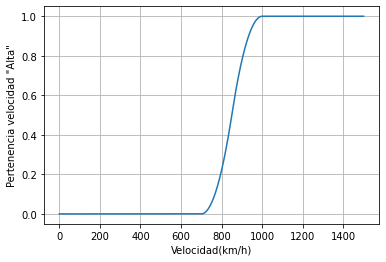

In [488]:
#Velocidad
#Conjunto borroso alta
vAlta = []
label_x = "Velocidad(km/h)"
label_y = 'Pertenencia velocidad "Alta"'

#Funcion de velocidad Alta en un punto x
def funcion_VelocidadAlta(x):
  return funcionSigmoidal(x,alfa=700,beta=850,epsilon=1000,direccion='derecha')

#Rellenar el array 
for x in v_recta:
  vAlta.append(funcion_VelocidadAlta(x))

graficar(v_recta,vAlta,label_x,label_y)


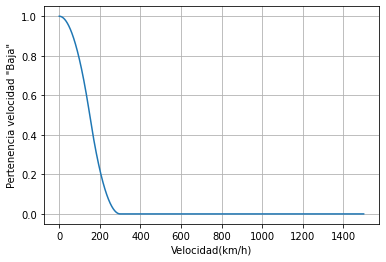

In [489]:
#Velocidad
#Conjunto borroso Baja
vBaja = []
label_x = "Velocidad(km/h)"
label_y = 'Pertenencia velocidad "Baja"'

#Funcion de velocidad Baja en un punto x
def funcion_VelocidadBaja(x):
  return funcionSigmoidal(x,alfa=0,beta=150,epsilon=300,direccion='izquierda')

#Rellenar el array 
for x in v_recta:
  vBaja.append(funcion_VelocidadBaja(x))

graficar(v_recta,vBaja,label_x,label_y)

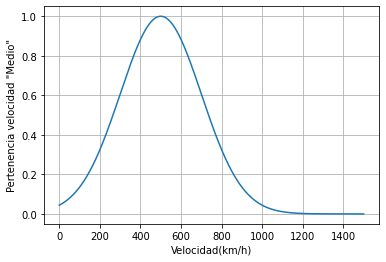

In [490]:
#Velocidad
#Conjunto borroso Medio
vMedio = []
label_x = "Velocidad(km/h)"
label_y = 'Pertenencia velocidad "Medio"'

#Funcion de velocidad Medio en un punto x
def funcion_VelocidadMedio(x):
  return funcionGaussiana(x,mitad=500,rango=200)

#Rellenar el array 
for x in v_recta:
  vMedio.append(funcion_VelocidadMedio(x))

graficar(v_recta,vMedio,label_x,label_y)


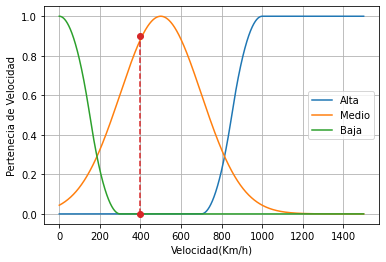

In [478]:
#Translape de velocidad
plt.plot(v_recta,vAlta, label ="Alta")
plt.plot(v_recta,vMedio, label ="Medio")
plt.plot(v_recta,vBaja, label ="Baja")

plt.xlabel('Velocidad(Km/h)')
plt.ylabel('Pertenecia de Velocidad')
plt.plot([np.float64(400), np.float64(400)], [0.0,0.90], linestyle="--", marker ="o")
plt.grid()
plt.legend()


#Angulo

In [ ]:
a_rangoi = -10
a_rangof = 11
a_recta = np.arange(-10, 10, 0.1)

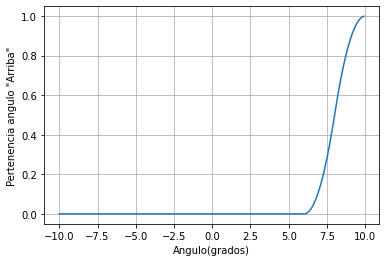

In [491]:
#Angulo
#Conjunto borroso Arriba
aArriba = []
label_x = "Angulo(grados)"
label_y = 'Pertenencia angulo "Arriba"'

#Funcion de Angulo Arriba en un punto x
def funcion_AnguloArriba(x):
  return funcionSigmoidal(x,alfa=6,beta=8,epsilon=10,direccion='derecha')

#Rellenar el array 
for x in a_recta:
  aArriba.append(funcion_AnguloArriba(x))

graficar(a_recta,aArriba,label_x,label_y)

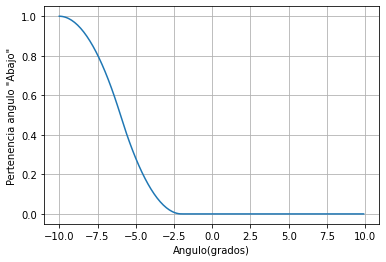

In [492]:

#Conjunto borroso Abajo
aAbajo = []
label_x = "Angulo(grados)"
label_y = 'Pertenencia angulo "Abajo"'

#Funcion de Angulo Abajo en un punto x
def funcion_AnguloAbajo(x):
  return funcionSigmoidal(x,alfa=-10,beta=-6,epsilon=-2,direccion='izquierda')

#Rellenar el array 
for x in a_recta:
  aAbajo.append(funcion_AnguloAbajo(x))

graficar(a_recta,aAbajo,label_x,label_y)


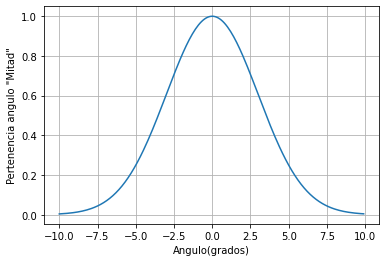

In [493]:
#Angulo
#Conjunto borroso ok
aMitad = []
label_x = "Angulo(grados)"
label_y = 'Pertenencia angulo "Mitad"'

#Funcion de Angulo ok en un punto x
def funcion_AnguloMitad(x):
  return funcionGaussiana(x,mitad=0,rango=3)

#Rellenar el array 
for x in a_recta:
  aMitad.append(funcion_AnguloMitad(x))

graficar(a_recta,aMitad,label_x,label_y)

0.02856550078455019


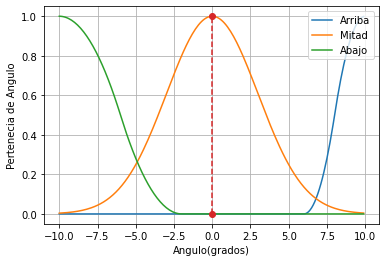

In [510]:
#Translape de Angulo
plt.plot(a_recta,aArriba, label = "Arriba")
plt.plot(a_recta,aMitad, label = "Mitad")
plt.plot(a_recta,aAbajo, label = "Abajo")

plt.xlabel('Angulo(grados)')
plt.ylabel('Pertenecia de Angulo')
plt.grid()
plt.plot([np.float64(0), np.float64(0)], [0.0,1], linestyle="--", marker ="o")
print(aMitad[20])
plt.legend(loc='upper right')


#Posición

In [ ]:
p_rangoi = 0
p_rangof = 12
p_recta = np.arange(0, 10, 0.1)

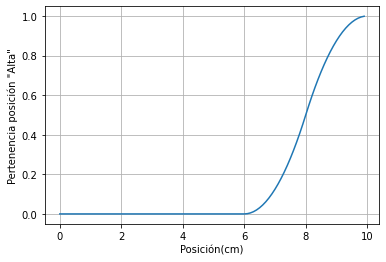

In [495]:
#Posición
#Conjunto borroso Alta
pAlta = []
label_x="Posición(cm)"
label_y='Pertenencia posición "Alta"'

#Funcion de Posicion Alta en un punto x
def funcion_PosicionAlta(x):
  return funcionSigmoidal(x,alfa=6,beta=8,epsilon=10,direccion='derecha')

#Rellenar el array 
for x in p_recta:
  pAlta.append(funcion_PosicionAlta(x))

graficar(p_recta,pAlta,label_x,label_y)


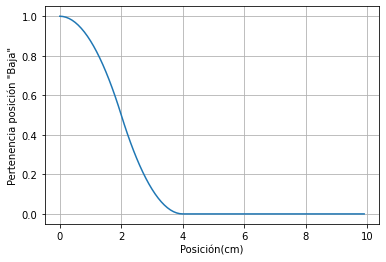

In [496]:
#Posición
#Conjunto borroso Baja
pBaja = []
label_x = "Posición(cm)"
label_y = 'Pertenencia posición "Baja"'

#Funcion de Posicion Baja en un punto x
def funcion_PosicionBaja(x):
  return funcionSigmoidal(x,alfa=0,beta=2,epsilon=4,direccion='izquierda')

#Rellenar el array 
for x in p_recta:
  pBaja.append(funcion_PosicionBaja(x))

graficar(p_recta,pBaja,label_x,label_y)



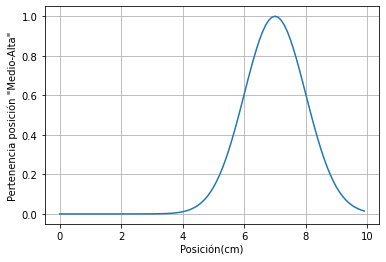

In [497]:
#Posición
#Conjunto borroso Medio-Alta
pMAlta = []
label_x = "Posición(cm)"
label_y = 'Pertenencia posición "Medio-Alta"'

#Funcion de Posicion Medio Alta en un punto x
def funcion_PosicionMedioAlta(x):
  return funcionGaussiana(x,mitad=7,rango=1)

#Rellenar el array 
for x in p_recta:
  pMAlta.append(funcion_PosicionMedioAlta(x))

graficar(p_recta,pMAlta,label_x,label_y)


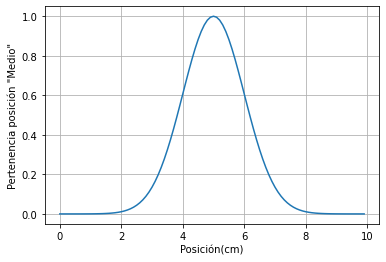

In [498]:
#Posición
#Conjunto borroso Medio
pMedio = []
label_x = "Posición(cm)"
label_y = 'Pertenencia posición "Medio"'

#Funcion de Posicion Medio en un punto x
def funcion_PosicionMedio(x):
  return funcionGaussiana(x,mitad=5,rango=1)

#Rellenar el array 
for x in p_recta:
  pMedio.append(funcion_PosicionMedio(x))

graficar(p_recta,pMedio,label_x,label_y)

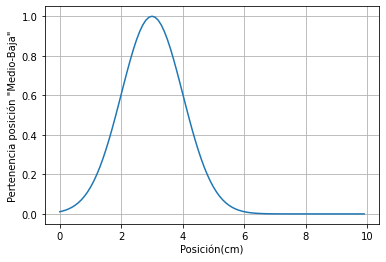

In [499]:
#Posición
#Conjunto borroso Medio-Baja
pMBaja = []
label_x = "Posición(cm)"
label_y = 'Pertenencia posición "Medio-Baja"'

#Funcion de Posicion Medio Baja en un punto x
def funcion_PosicionMedioBaja(x):
  return funcionGaussiana(x,mitad=3,rango=1)

#Rellenar el array 
for x in p_recta:
  pMBaja.append(funcion_PosicionMedioBaja(x))

graficar(p_recta,pMBaja,label_x,label_y)


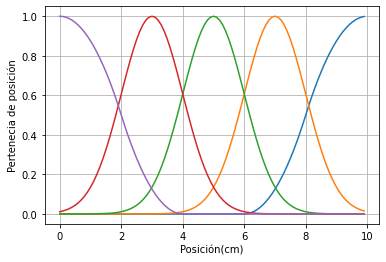

In [501]:
#Translape de Posición
plt.plot(p_recta,pAlta,p_recta,pMAlta,p_recta,pMedio,p_recta,pMBaja,p_recta,pBaja)
plt.xlabel('Posición(cm)')
plt.ylabel('Pertenecia de posición')
plt.grid()


# Evaluacion de las reglas

In [508]:
#Funcion de larsen para devolver los minimos de los conjuntos y multiplicarlos
def larsen(*funciones_difusas):
  resultado = []
  for x, funcion_difusa in funciones_difusas:
    #Se agrega a un solo Array todos los valores de entrada donde se selecciona el menor entre ellos
    resultado.append(funcion_difusa(x))
  return min(resultado)

#Funcion para evaluar la regla con respecto a la funcion de salida
def evaluar(resultado_regla, funcion_salida):
  resultado = []
  for x in p_recta:
    #Se multiplica el resultado de larsen con cada valor de la funcion de salida
    resultado.append((resultado_regla * funcion_salida(x)))
  return resultado

#Iniciar las 2 funciones anteriores
def evaluarRegla(x1,funcion_entrada1, x2,funcion_entrada2,funcion_salida):
  regla = larsen((x1, funcion_entrada1), (x2, funcion_entrada2))
  return evaluar(regla, funcion_salida)

In [506]:
#Funcion para graficar el resultado final
#Una grafica donde se muestra el resultado del proceso son Larsen
#Y otra grafica con el translape de los conjuntos difusos de salida
def graficaFinal(rules, agregacion):

  fig, axis= plt.subplots(2,1,figsize=(10,10))
 
  #Larsen
  axis[0].fill(p_recta, agregacion, color = 'cadetblue', label="Larsen aplicado")
  axis[0].legend(loc='upper right')
  axis[0].grid()
  
  #Conjuntos difusos
  axis[1].plot(p_recta, pAlta, label = "P Alta")
  axis[1].plot(p_recta, pMAlta,  label = "P Medio-Alta")
  axis[1].plot(p_recta, pMedio, label = "P Medio")
  axis[1].plot(p_recta, pMBaja,  label = "P Medio-Baja")
  axis[1].plot(p_recta, pBaja,  label = "P Baja")
  axis[1].legend(loc='upper right')
  axis[1].grid()
  #Reglas
  for rule in rules:
    axis[1].fill(p_recta, rule, color="cadetblue")

 
  

In [504]:
#Sacar el valor maximo de cada regla
def agregacion_union(*rules):
  return [max(rule) for rule in zip(*rules)]

In [505]:
#Funcion para calcular el centro de area
def centro_de_areas(recta, valores_membresia):
  suma = 0
  for valor, membresia in zip(recta, valores_membresia):
      suma += valor * membresia
  return suma / sum(valores_membresia)

Ingese un valor de entrada para la velocidad (entre 0 y 1000): 400
Ingrese un valor de entrada para el angulo (entre 0 y 10): 0
Centro de area: 4.999999256639807


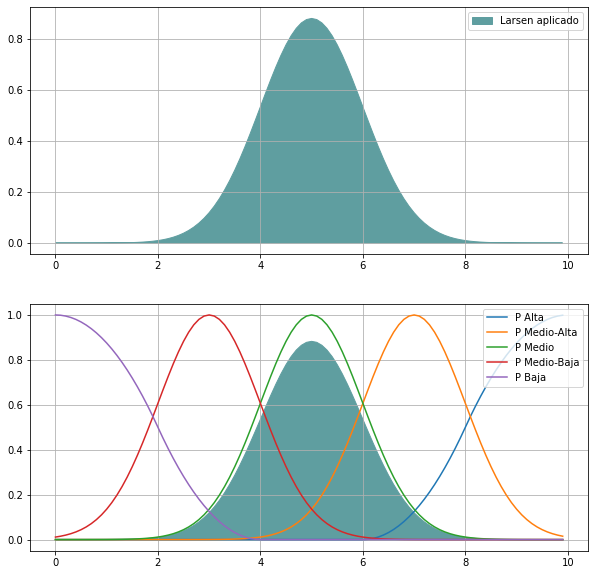

In [509]:
#Algoritmo para ingresar los valores de entrada
x1=input('Ingese un valor de entrada para la velocidad (entre 0 y 1000): ')
x2=input('Ingrese un valor de entrada para el angulo (entre 0 y 10): ')

rules = []
#Reglas
rule1 = evaluarRegla(int(x1),funcion_VelocidadAlta, int(x2),funcion_AnguloArriba, funcion_PosicionMedioBaja)
rules.append(rule1)
rule2 = evaluarRegla(int(x1),funcion_VelocidadAlta, int(x2),funcion_AnguloMitad, funcion_PosicionMedioBaja)
rules.append(rule2)
rule3 = evaluarRegla(int(x1),funcion_VelocidadAlta, int(x2),funcion_AnguloAbajo, funcion_PosicionBaja)
rules.append(rule3)
rule4 = evaluarRegla(int(x1),funcion_VelocidadMedio, int(x2),funcion_AnguloArriba, funcion_PosicionMedioAlta)
rules.append(rule4)
rule5 = evaluarRegla(int(x1),funcion_VelocidadMedio, int(x2),funcion_AnguloMitad, funcion_PosicionMedio)
rules.append(rule5)
rule6 = evaluarRegla(int(x1),funcion_VelocidadMedio, int(x2),funcion_AnguloAbajo, funcion_PosicionMedioBaja)
rules.append(rule6)
rule7 = evaluarRegla(int(x1),funcion_VelocidadBaja, int(x2),funcion_AnguloArriba, funcion_PosicionAlta)
rules.append(rule7)
rule8 = evaluarRegla(int(x1),funcion_VelocidadBaja, int(x2),funcion_AnguloMitad, funcion_PosicionMedioAlta)
rules.append(rule8)
rule9 = evaluarRegla(int(x1),funcion_VelocidadBaja, int(x2),funcion_AnguloAbajo, funcion_PosicionMedioAlta)
rules.append(rule9)

agregacion = agregacion_union(rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9)

print("Centro de area:",centro_de_areas(p_recta,agregacion))

graficaFinal(rules, agregacion)